<a href="https://colab.research.google.com/github/HarshitS45/Ensemble-based-approach-for-attack-detectation-in-financial-system/blob/main/Attack_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML PROJECT**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
import scipy
import seaborn as sns

1: Data collection and its information

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/dataset.csv /content/

cp: cannot stat '/content/drive/MyDrive/dataset.csv': No such file or directory


In [ ]:
df=pd.read_csv('dataset.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


1) step: the unit of time in seconds (1 step = 1 second)

2) type: the type of transaction (CASH-IN, CASH-OUT, DEBIT, PAYMENT, or TRANSFER)

CASH-IN: A transaction where money is deposited into an account, either in cash or via a transfer from another account.
CASH-OUT: A transaction where money is withdrawn from an account, either in cash or via a transfer to another account.
DEBIT: A transaction where money is deducted from an account to pay for a purchase or a service.
PAYMENT: A transaction where money is transferred from one account to another to settle a debt or make a payment.
TRANSFER: A transaction where money is moved from one account to another, either within the same entity or between different entities.

3) amount: the amount of the transaction

4) nameOrig: the customer who started the transaction (originator)

5) oldbalanceOrg: the initial balance before the transaction for the originator

6) newbalanceOrig: the balance after the transaction for the originator

7) nameDest: the customer who received the transaction (destination)

8) oldbalanceDest: the initial balance before the transaction for the destination

9) newbalanceDest: the balance after the transaction for the destination

10) isFraud: a binary flag indicating whether the transaction is fraudulent (1) or not (0)

11) isFlaggedFraud: a binary flag indicating whether the transaction is flagged as fraudulent (1) or not (0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().values.any()

False

In [ ]:
'''dataset = dataset.rename(columns={"isFraud": "Class"})
dataset = dataset.rename(columns={"amount": "Amount"})
dataset = dataset.rename(columns={"nameOrig": "srcAddress"})
dataset = dataset.rename(columns={"nameDest": "destAddress"})'''


'dataset = dataset.rename(columns={"isFraud": "Class"})\ndataset = dataset.rename(columns={"amount": "Amount"})\ndataset = dataset.rename(columns={"nameOrig": "srcAddress"})\ndataset = dataset.rename(columns={"nameDest": "destAddress"})'

EXtracting 3 important features

In [ ]:
# Extract the features
#dataset[['Amount', 'Class']]

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


2: Data Preprocessing

In [ ]:
df = df.dropna() # Removes all rows with null values

In [ ]:
df.isnull().values.any()

False

In [ ]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
# making list of amount
amount=df['amount'].tolist()
print(amount)
# creating list of fraudulent
isFraud=df['isFraud'].tolist()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
### APPLIED MULTIPLE LINEAR REGRESSION HERE
# OTHer columns dont have the potential relations
# Filter the DataFrame to only include numeric columns
#plt.scatter(time, isFraud, color=['blue' if x == 0 else 'orange' for x in isFraud])

# Setting the labels for the x and y axes
#plt.xlabel("Time")
#plt.ylabel("Fraud")

# Displaying the scatter plot
#plt.show()


<ipython-input-18-2a493594a919>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df.corr()


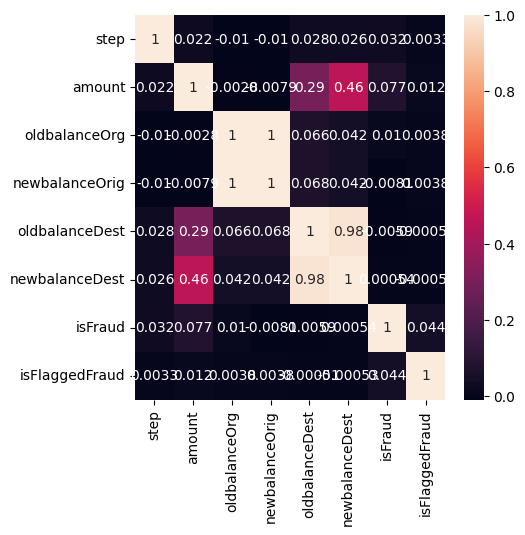

In [ ]:
# heatMap
corrmat=df.corr()
correlatingFeature=corrmat.index
plt.figure(figsize=(5,5))
g=sns.heatmap(df[correlatingFeature].corr(), annot=True)

Text(0.5, 1.0, 'nonFradulent transaction VS fraudulent transaction')

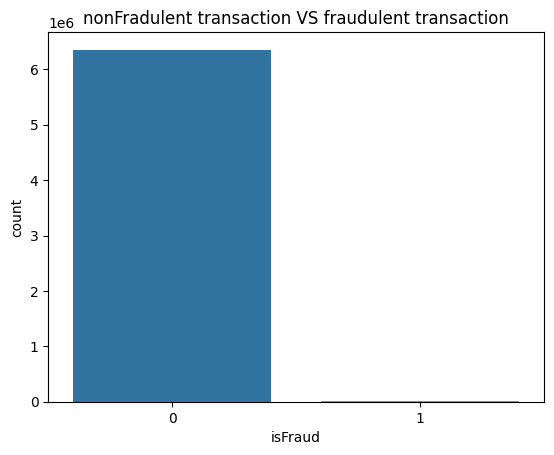

In [ ]:
sns.countplot(x=df['isFraud'], data=df)
plt.title('nonFradulent transaction VS fraudulent transaction')

OverSampling

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(df['isFraud'].value_counts())

0    6354407
1       8213
Name: isFraud, dtype: int64


In [ ]:
"""from imblearn.over_sampling import SMOTE

X = df.drop('isFraud', axis=1)  # Extracting the feature variables
y = df['isFraud']  # Extracting the target variable



# Applying SMOTE oversampling
smote = SMOTE() # or fixxed random no statte
X_resampled, y_resampled = smote.fit_resample(X, y)

# Creating a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_resampled.columns = df.columns

# Checking the class distribution after SMOTE oversampling
print(df_resampled['Class'].value_counts())
# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)"""

"from imblearn.over_sampling import SMOTE\n\nX = df.drop('isFraud', axis=1)  # Extracting the feature variables\ny = df['isFraud']  # Extracting the target variable\n\n\n\n# Applying SMOTE oversampling\nsmote = SMOTE() # or fixxed random no statte\nX_resampled, y_resampled = smote.fit_resample(X, y)\n\n# Creating a new DataFrame with the resampled data\ndf_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)\ndf_resampled.columns = df.columns\n\n# Checking the class distribution after SMOTE oversampling\nprint(df_resampled['Class'].value_counts())\n# Apply SMOTE to balance the classes in the training data\nsmote = SMOTE(random_state=42)\nX_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)"

SMOTE(Synthetic Minority Over-sampling Technique):SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space

In [ ]:
duplicated_rows = df.duplicated()
if duplicated_rows.any():
    print("Dataset contains duplicated rows.")
else:
    print("Dataset does not contain duplicated rows.")

Dataset does not contain duplicated rows.


In [ ]:
df = df.drop_duplicates()

In [ ]:
duplicated_rows = df.duplicated()
if duplicated_rows.any():
    print("Dataset contains duplicated rows.")
else:
    print("Dataset does not contain duplicated rows.")

In [ ]:
print(df_resampled['Class'].value_counts())

Here we diivided the dataset into training and testing set in 80 and 20 percentage

Now, check whether training and testing set are duplicate free

**PROCEED WITH MODELING::**

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# randomly sample 10% of the data
df = df.sample(frac=0.01, random_state=42)

In [ ]:
# Remove nameOrig and nameDest columns
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
# Convert categorical data to numeric
df = pd.get_dummies(df, columns=['type'])

In [ ]:


# Split the dataset into training and testing sets
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Create random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Create gradient boosting classifier
gbc = GradientBoostingClassifier(random_state=42)

# Create ensemble of classifiers
ensemble = VotingClassifier(estimators=[('dt', dtc), ('rf', rfc), ('gb', gbc)], voting='hard')

# Fit the ensemble model to the training data
ensemble.fit(X_train, y_train)

# Predict on the test data
y_pred = ensemble.predict(X_test)

# Calculate the accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy score:", accuracy)
print("Confusion matrix:\n", confusion)

Accuracy for each individual algos and ensemble methods

In [ ]:


from sklearn.metrics import classification_report

# Decision Tree Classifier
dtc.fit(X_train, y_train)
y_pred_dt = dtc.predict(X_test)
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

# Random Forest Classifier
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Gradient Boosting Classifier
gbc.fit(X_train, y_train)
y_pred_gb = gbc.predict(X_test)
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))

# Ensemble of Classifiers
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
print("Ensemble of Classifiers:")
print(classification_report(y_test, y_pred_ensemble))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the accuracy of each individual model and the ensemble model
dtc_accuracy = accuracy_score(y_test, dtc.predict(X_test))
rfc_accuracy = accuracy_score(y_test, rfc.predict(X_test))
gbc_accuracy = accuracy_score(y_test, gbc.predict(X_test))
ensemble_accuracy = accuracy_score(y_test, ensemble.predict(X_test))

# Create a bar plot to visualize the accuracy of each model
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Ensemble']
accuracies = [dtc_accuracy, rfc_accuracy, gbc_accuracy, ensemble_accuracy]
plt.bar(models, accuracies, color='blue')
plt.ylim([0.95, 1.0])
plt.ylabel('Accuracy')
plt.title('Accuracy of Individual Models and Ensemble')
plt.show()